## Data Science Bootcamp Week 3 Assignment - October 22nd

By: Liliana Pamasa


#### 1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T/ipykernel_40061/1143234764.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


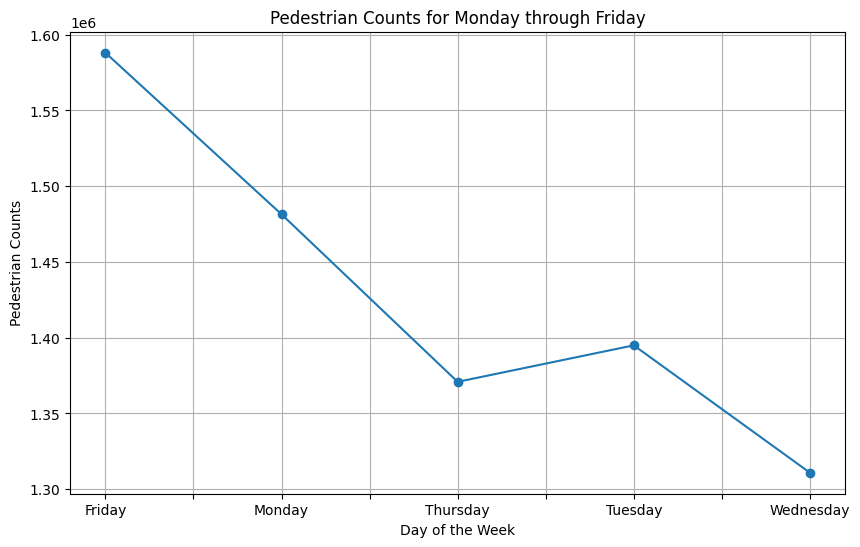

In [34]:
# Change 'hour_beginning' column to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# extract weekdays (between integers 0 and 4) 
mon_2_fri = df[(df['hour_beginning'].dt.dayofweek >= 0) & (df['hour_beginning'].dt.dayofweek <= 4)]
#print(mon_2_fri)

# extract the day name from the date 
weekdays = mon_2_fri['hour_beginning'].dt.day_name()

# group the weekdays by the sum of pedestrians
pedestrian_per_day = mon_2_fri.groupby(weekdays)['Pedestrians'].sum()

# plot the graph
plt.figure(figsize=(10, 6))
pedestrian_per_day.plot(kind='line', marker='o') #Making a line plot
plt.title('Pedestrian Counts for Monday through Friday')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()

#### 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

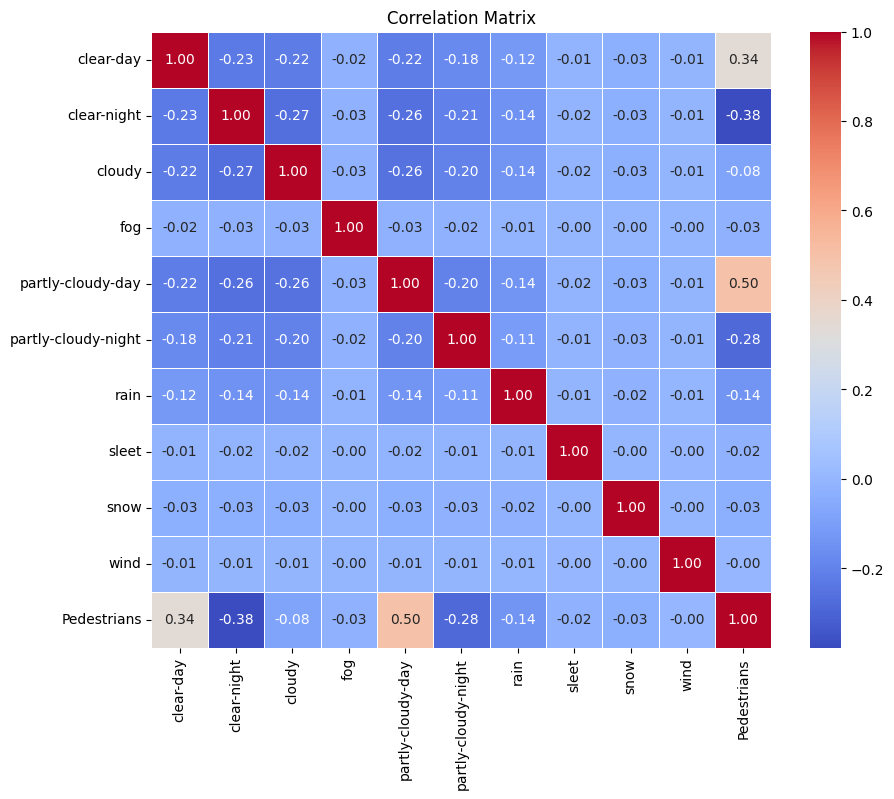

In [36]:
# filter data for brooklyn bridge in 2019
bb_2019 = df[(df['hour_beginning'].dt.year == 2019) & (df['location'] == 'Brooklyn Bridge')]
#print(bb_2019)

# one-hot encoding non-numeric weather summary  
weather_summary = pd.get_dummies(bb_2019['weather_summary'])

# link encoded weather summary with pedestrian counts
encoded_data = pd.concat([weather_summary, bb_2019['Pedestrians']], axis=1)

# Calculate correlation matrix
corr_mat = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### 3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [38]:

def time_of_day(hr):
''' categorize time of day '''
    if 5 <= hr < 12:
        return 'Morning'
    elif 12 <= hr < 17:
        return 'Afternoon'
    elif 17 <= hr < 22:
        return 'Evening'
    else:
        return 'Night'

# new column to store data
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(time_of_day)

# group pedestrian activity throughout the day
ped_activity = df.groupby('time_of_day')['Pedestrians'].sum()
print(ped_activity)

time_of_day
Afternoon    5852025
Evening      2547548
Morning      2480582
Night         152711
Name: Pedestrians, dtype: int64
